In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [6]:
X = df.drop('Strength', axis = 1)
y = df['Strength']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(824, 8)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.6275531792314848

In [10]:
#Cross_validation for cross checking
np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='r2'))

np.float64(0.5894185601991604)

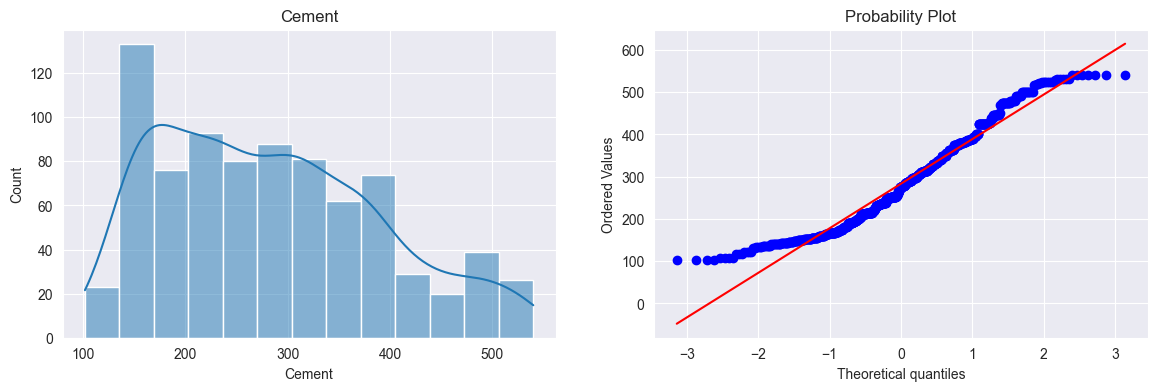

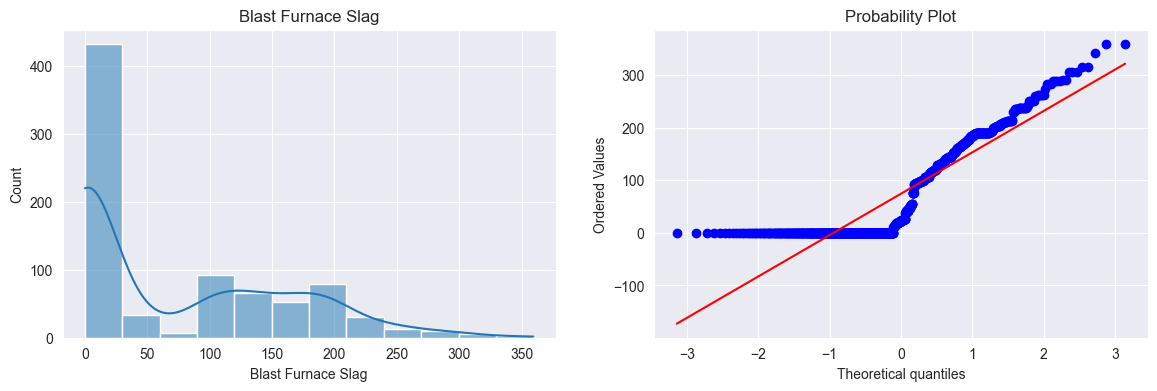

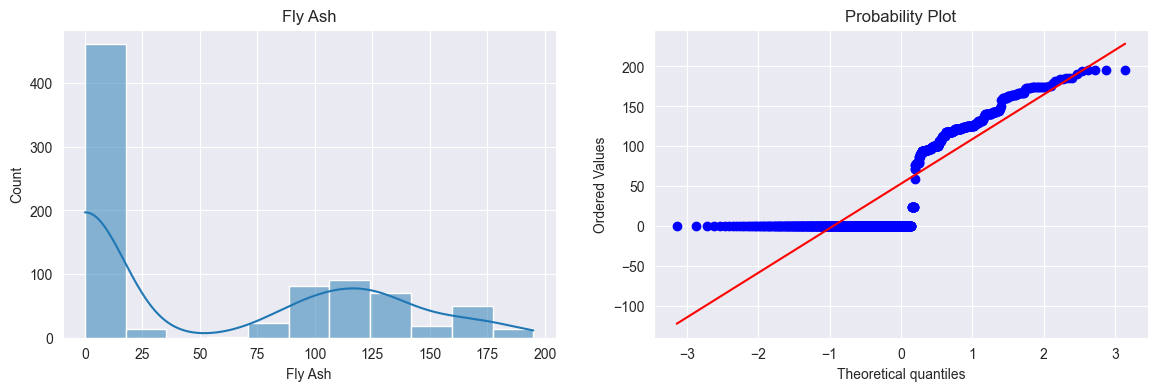

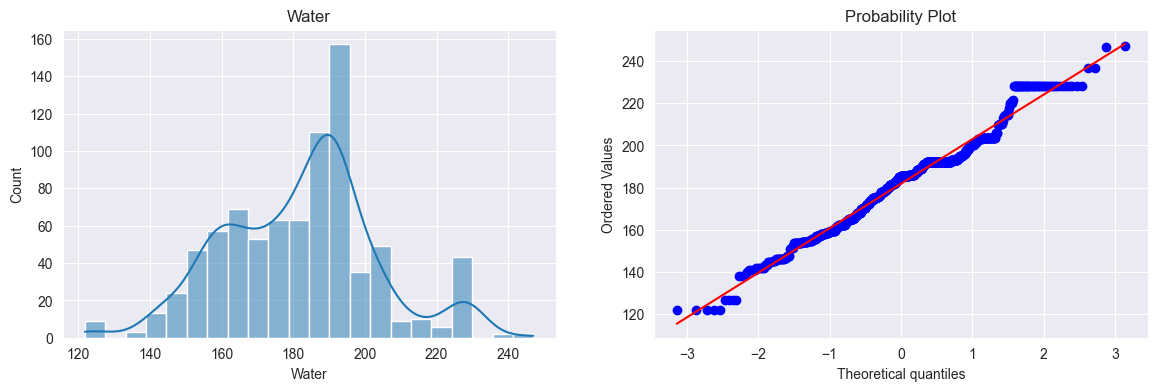

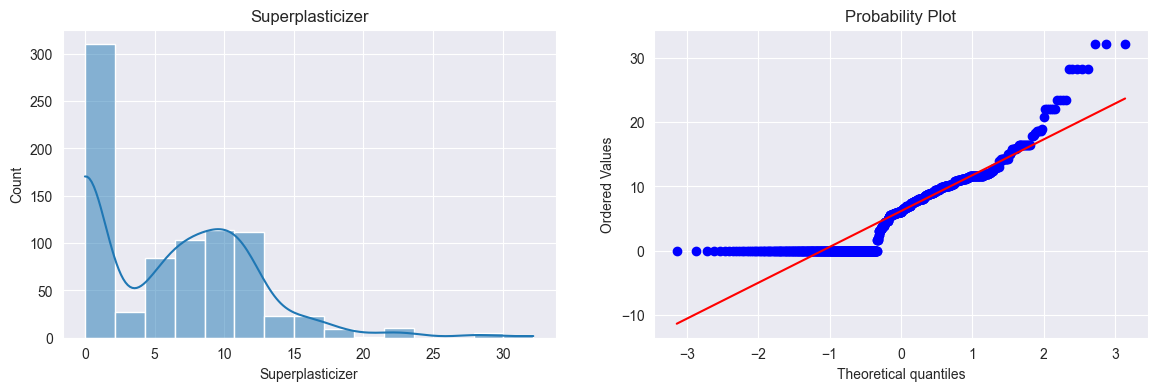

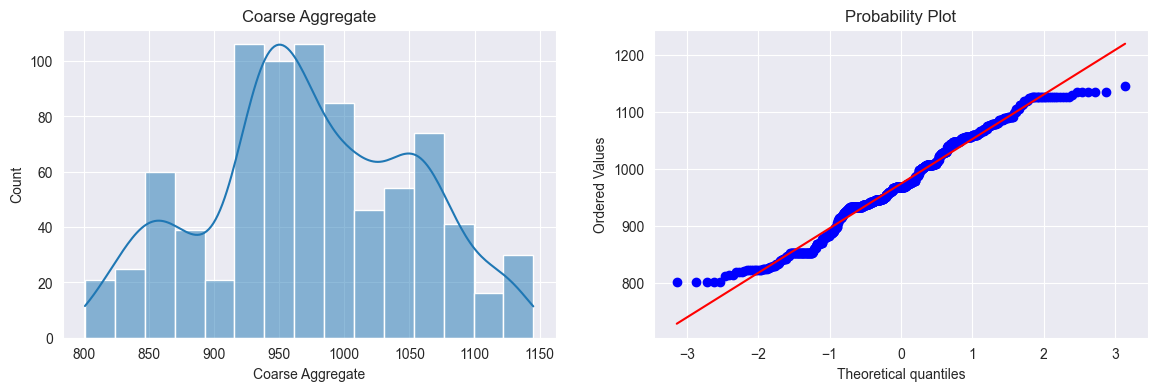

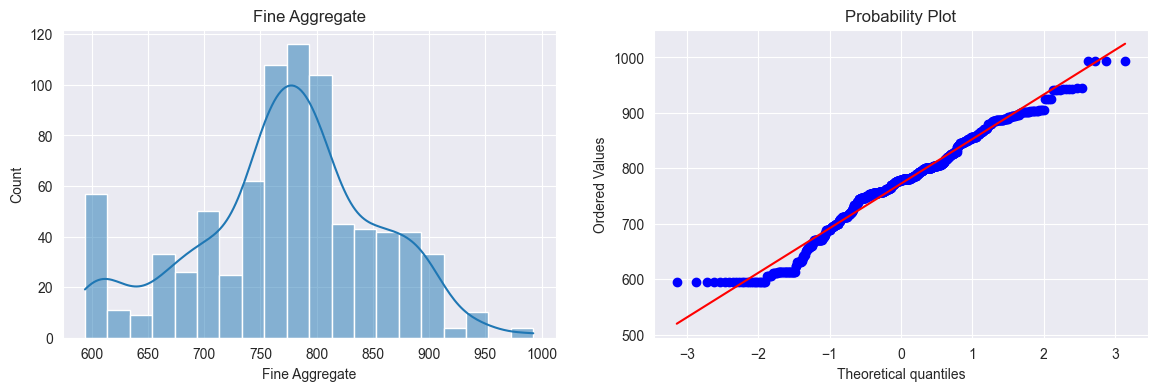

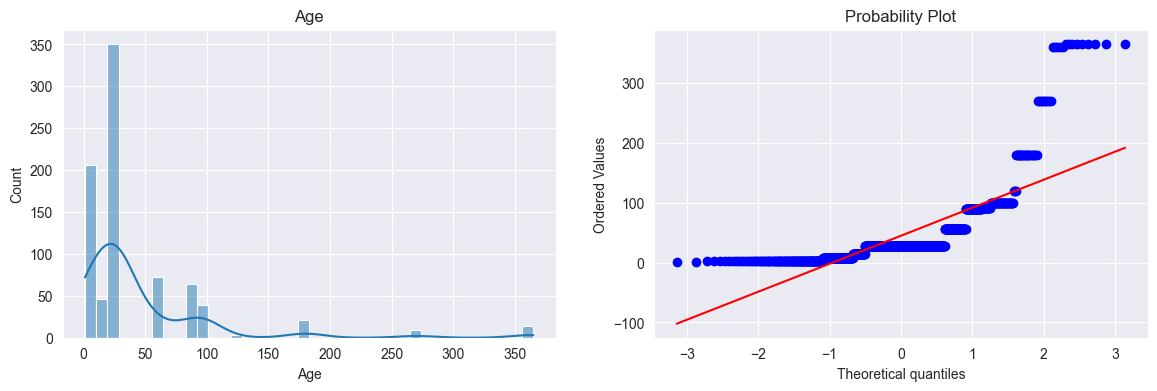

In [11]:
for col in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
    plt.title(col)
    # plt.show()

    plt.subplot(122)
    stats.probplot(X_train[col], plot=plt)
    plt.show()

In [12]:
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train + 0.0000001)
X_test_transformed = pt.transform(X_test + 0.0000001)

In [13]:
print(pd.DataFrame({'Cols': X_train.columns, 'Lambda': pt.lambdas_})) #provides the best lambda values for each column

                 Cols    Lambda
0              Cement  0.174348
1  Blast Furnace Slag  0.015715
2             Fly Ash -0.161447
3               Water  0.771307
4    Superplasticizer  0.253935
5    Coarse Aggregate  1.130050
6      Fine Aggregate  1.783100
7                 Age  0.019885


In [14]:
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred_transformed = lr.predict(X_test_transformed)
r2_score(y_test, y_pred_transformed)

0.8161906517757739

In [16]:
pt = PowerTransformer(method = "box-cox")
pt.fit(X + 0.000001)
X_transform = pt.transform(X + 0.00001)
np.mean(cross_val_score(lr, X_transform, y, cv=10, scoring='r2'))

np.float64(0.6474435178287814)

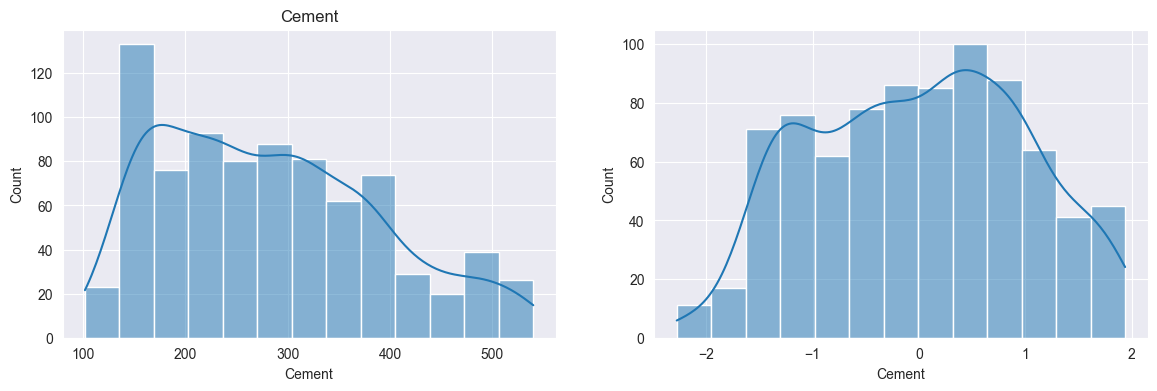

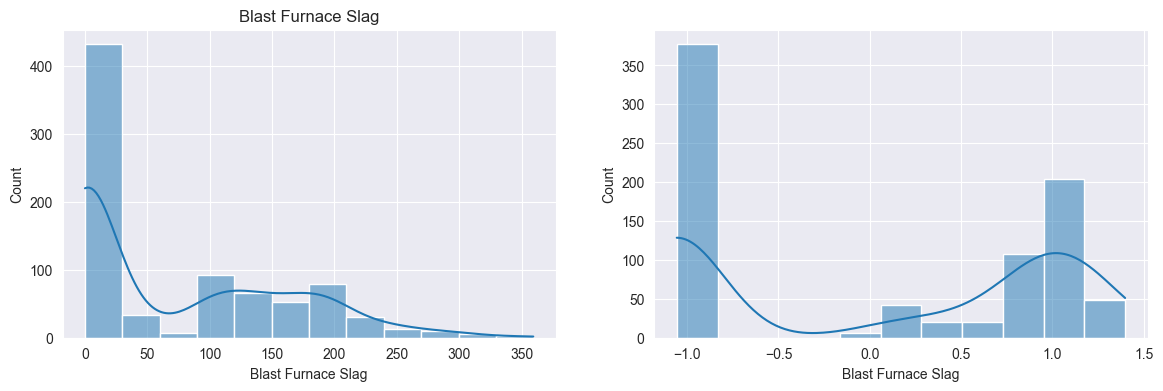

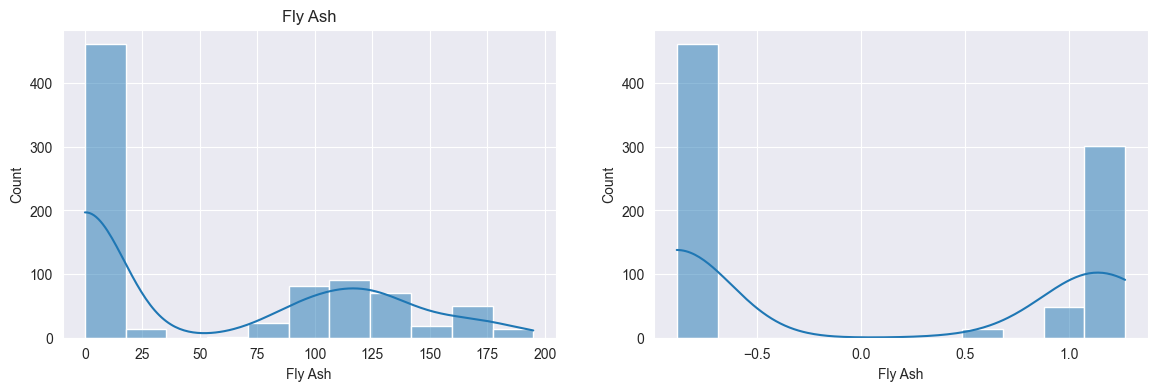

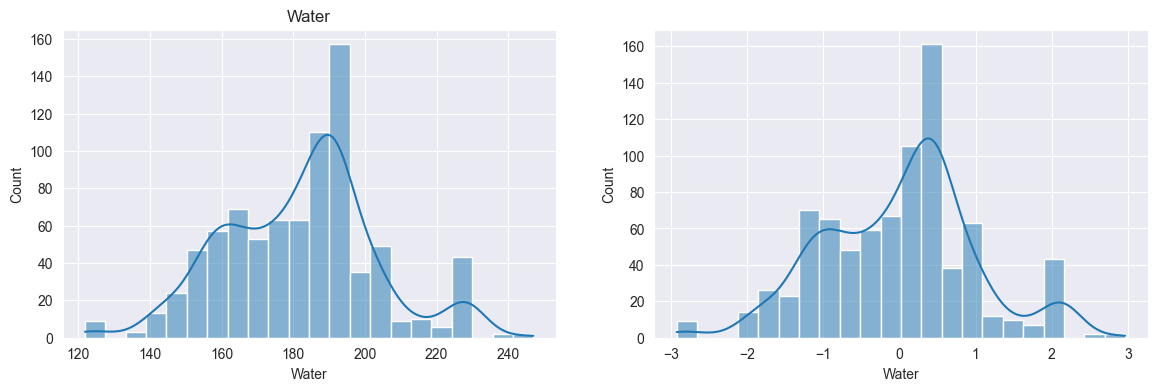

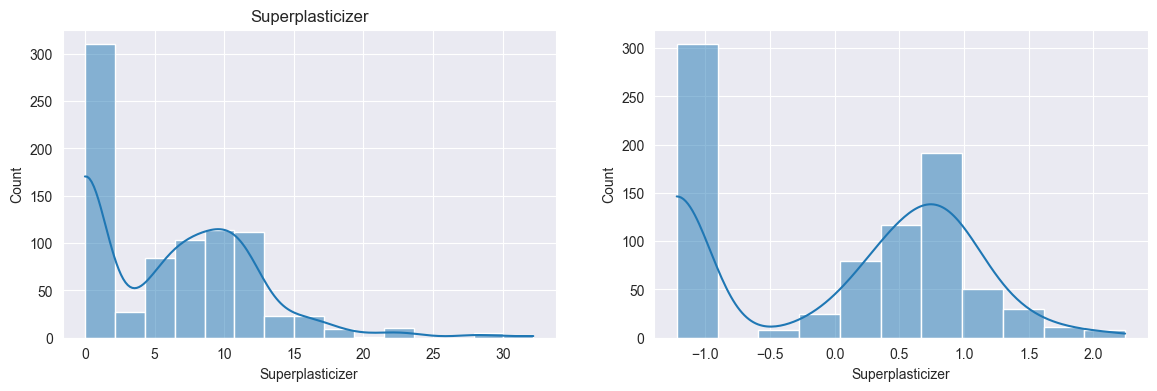

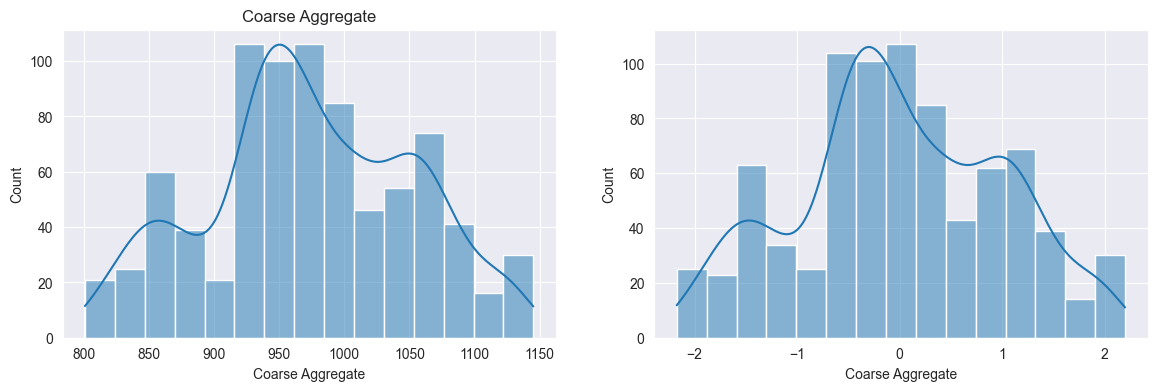

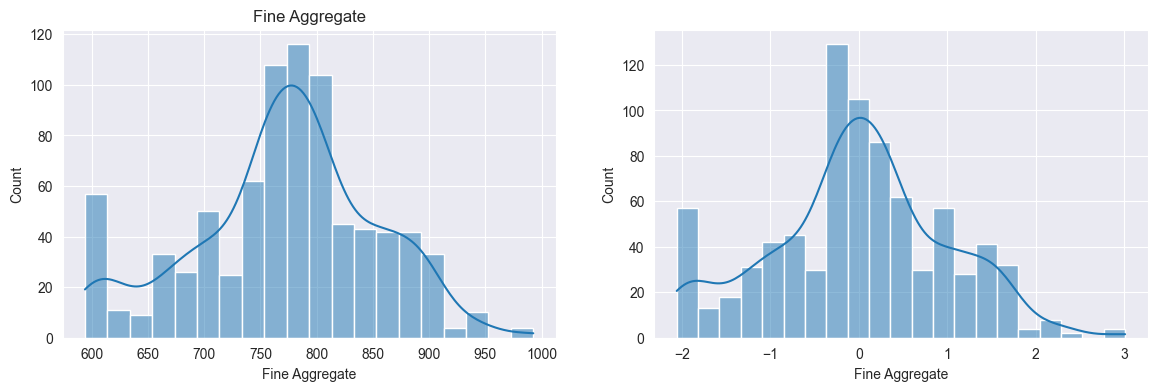

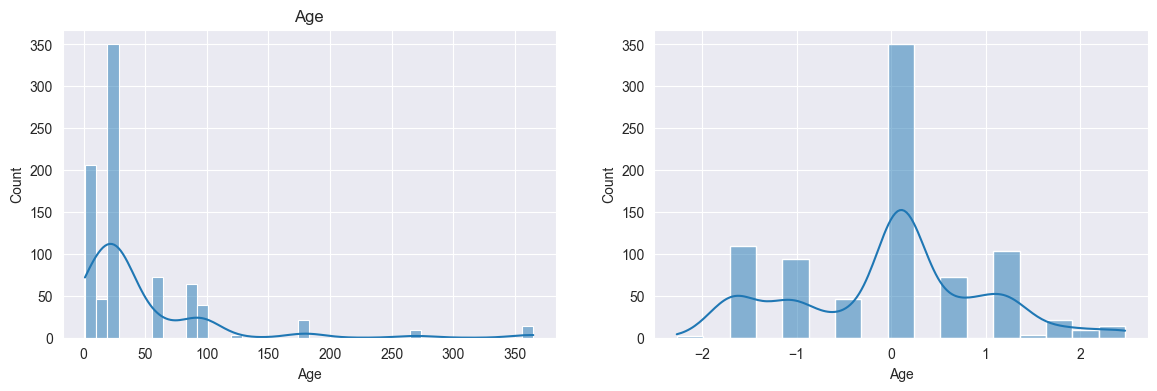

In [21]:
for col in X_train_transformed.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde = True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde = True)

In [20]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)

In [23]:
#yeo - johnson transformation
pt = PowerTransformer()
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred_transformed = lr.predict(X_test_transformed)
r2_score(y_test, y_pred_transformed)

0.8161906513339304

In [25]:
np.mean(cross_val_score(lr, X_transform, y, cv=10, scoring='r2'))

np.float64(0.6586548624046112)

In [24]:
pt = PowerTransformer()
pt.fit(X)
X_transform = pt.transform(X)
